In [328]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [329]:
df = pd.read_csv(r"C:\git\medical-data-visualizer\medical_examination.csv")

In [330]:
df['overweight'] = (df["weight"] / ((df["height"] / 100) ** 2) > 25).astype(int)

In [331]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

In [332]:
strip_c0 = df[df['cardio'] == 0][["active", "alco", "cholesterol", "gluc", "overweight", "smoke"]]
ones_c0 = strip_c0.sum()
zeros_c0 = (strip_c0 == 0).sum()

collapsed_c0 = pd.DataFrame([zeros_c0, ones_c0], index = ['0', '1'])
cardio0_df = collapsed_c0.reset_index().melt(id_vars='index', var_name='variable', value_name='total')
cardio0_df = cardio0_df.rename(columns={'index': 'value'})

In [333]:
strip_c1 = df[df['cardio'] == 1][["active", "alco", "cholesterol", "gluc", "overweight", "smoke"]]
ones_c1 = strip_c1.sum()
zeros_c1 = (strip_c1 == 0).sum()

collapsed_c1 = pd.DataFrame([zeros_c1, ones_c1], index = ['0', '1'])
cardio1_df = collapsed_c1.reset_index().melt(id_vars='index', var_name='variable', value_name='total')
cardio1_df = cardio1_df.rename(columns={'index': 'value'})

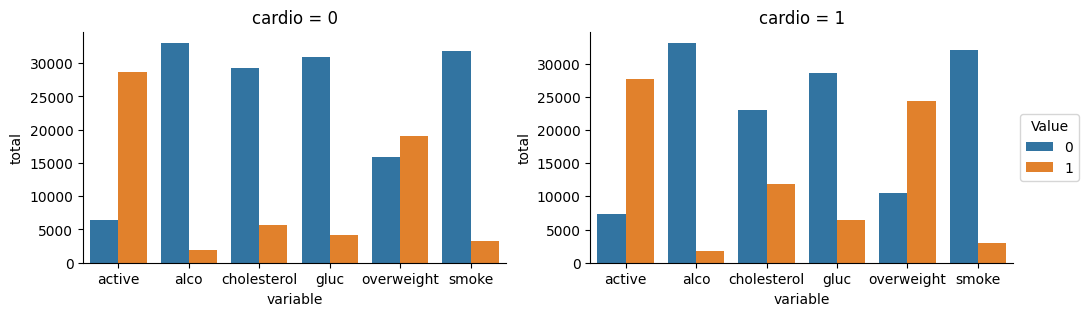

In [344]:
fig, ax = plt.subplots(1, 2, figsize = [12, 3])
sns.barplot(cardio0_df, x='variable',y='total', ax=ax[0], hue='value', legend=False);
sns.barplot(cardio1_df, x='variable',y='total', ax=ax[1], hue='value');
ax[0].set_title('cardio = 0');
ax[1].set_title('cardio = 1');
ax[1].legend(loc='center left', bbox_to_anchor = (1, 0.5), title='Value')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)


In [336]:
df_heat = df[(df['ap_lo'] < df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

<Axes: >

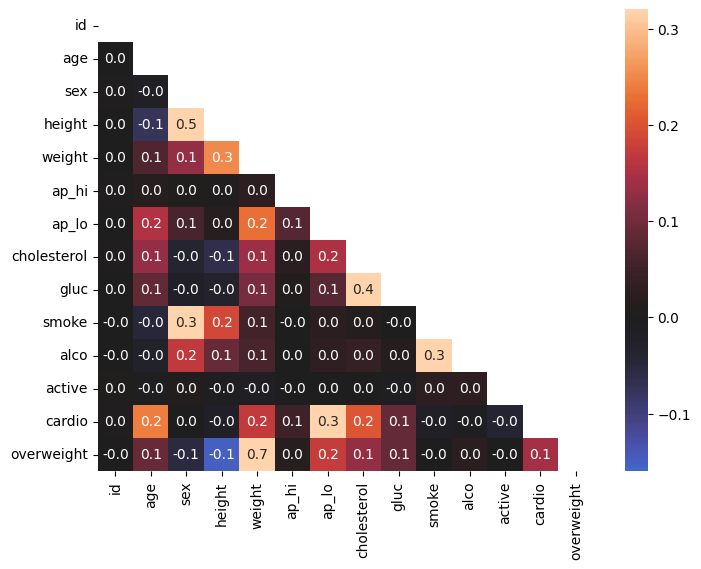

In [337]:
corr = df_heat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(1,1, figsize= [8,6])
sns.heatmap(corr, vmin=-0.16, vmax=0.32, mask=mask, annot=True, center=0, fmt='.1f')